In [1]:
from fastai.vision.all import *
from fastai.data.all import *
import pandas as pd

# Load data

In [2]:
path = Path('data')
train_val_folder = get_image_files(path/"train")
test_folder = get_image_files(path/"test")
train_val_data = pd.read_csv(path/'train_val_data.csv')

In [3]:
train_val_data.head()

,image,sports,is_valid
0,train/1635.jpg,gymnastics,False
1,train/7406.jpg,boxing,False
2,train/8026.jpg,ice_hockey,False
3,train/3869.jpg,tennis,False
4,train/3983.jpg,volleyball,False


In [16]:
data_block = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       splitter=ColSplitter(),
                       get_x=ColReader(0, pref='data/'),
                       get_y=ColReader(1),
                       item_tfms=Resize(224),
                       #batch_tfms=aug_transforms()
                      )

In [21]:
dls = data_block.dataloaders(train_val_data, bs=1)

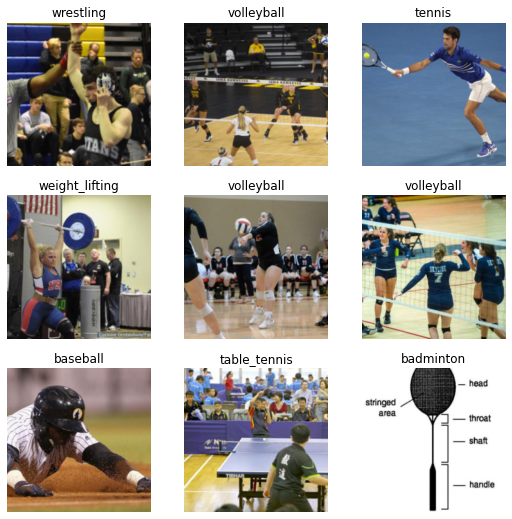

In [18]:
dls.show_batch()

# Finetune pretrained Resnet

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

In [23]:
learn.lr_find()

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 1.96 GiB total capacity; 968.34 MiB already allocated; 10.12 MiB free; 972.00 MiB reserved in total by PyTorch)